<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/SPYKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.style.use('fivethirtyeight')

In [33]:
#Load the data 
tick = 'AAPL','AMZN', 'MSFT', 'NFLX', 'NVDA', 'PYPL', 'SQ', 'META', 'SBUX', 'MA', 'V', 'MRNA', 'AXP', 'UNH', 'TSM', 'ASML', 'MU', 'AMD', 'MO', 'RTX', 'AMT','LOW', 'MS','ORCL','CAT','DE', 'MMM', 'F','CMG','CLX', 'K', 'CAG', 'PARA', 'GRMN', 'BMY', 'PFE', 'KO', 'PEP', 'BKNG', 'MAR', 'CRM', 'AMGN', 'JPM', 'BAC', 'PG', 'JNJ', 'XOM', 'CVX', 'CVS', 'NKE', 'MKC', 'COST', 'WMT', 'TGT', 'GOOG', 'AMZN', 'LMT', 'MCD', 'TSLA', 'FTNT', 'PANW', 'VZ', 'T', 'IBM', 'ABBV', 'ADBE','CSCO', 'WM', 'MRK', 'INTC', 'HD', 'DPZ', 'LRCX', 'TJX', 'IRM', 'DRI', 'POOL', 'TROW', 'WBA', 'HAL', 'TWTR', 'GIS', 'GM', 'NEM', 'BSX', 'FDX', 'UPS', 'SHW', 'EL', 'CL', 'ISRG', 'GS', 'DIS', 'ATVI'
#Show the data
df = yf.download(tick, start = '2019-01-01', end = '2022-8-4', interval='1d')
df = df[['Adj Close']]

df

[*********************100%***********************]  93 of 93 completed


Adj Close                                                 \
                  AAPL        ABBV        ADBE        AMD        AMGN   
Date                                                                    
2019-01-02   38.221371   74.248413  224.570007  18.830000  172.905289   
2019-01-03   34.414234   71.802032  215.699997  17.049999  170.274338   
2019-01-04   35.883350   74.115273  226.190002  19.000000  176.094879   
2019-01-07   35.803486   75.197021  229.259995  20.570000  178.464600   
2019-01-08   36.486012   75.546501  232.679993  20.750000  180.753174   
...                ...         ...         ...        ...         ...   
2022-07-28  157.350006  149.750000  403.500000  91.669998  249.750000   
2022-07-29  162.509995  143.509995  410.119995  94.470001  247.470001   
2022-08-01  161.509995  140.220001  411.089996  96.779999  245.639999   
2022-08-02  160.009995  140.389999  409.959991  99.290001  243.910004   
2022-08-03  166.130005  141.199997  424.540009  98.089996  247.139999   

                                                                       ...  \
                   AMT        AMZN        ASML       ATVI         AXP  ...   
Date                                                                   ...   
2019-01-02  146.548767   76.956497  150.506805  45.854473   90.748322  ...   
2019-01-03  147.427628   75.014000  142.206253  44.226219   88.976974  ...   
2019-01-04  148.016693   78.769501  148.359421  45.990974   92.986298  ...   
2019-01-07  148.932983   81.475502  151.748962  47.287731   93.491066  ...   
2019-01-08  150.615952   82.829002  150.631943  48.720989   93.948174  ...   
...                ...         ...         ...        ...         ...  ...   
2022-07-28  268.899994  122.279999  560.710022  79.510002  152.139999  ...   
2022-07-29  270.829987  134.949997  574.440002  79.949997  154.020004  ...   
2022-08-01  268.619995  135.389999  578.150024  80.080002  153.330002  ...   
2022-08-02  266.630005  134.160004  565.599976  79.320000  151.600006  ...   
2022-08-03  268.829987  139.520004  583.859985  80.589996  155.429993  ...   

                                                                      \
                  TSM       TWTR         UNH         UPS           V   
Date                                                                   
2019-01-02  33.102020  28.809999  230.789368   87.583069  130.002945   
2019-01-03  31.144188  27.990000  224.495697   85.096375  125.318085   
2019-01-04  31.697096  29.950001  227.121216   88.060570  130.716934   
2019-01-07  31.932756  31.340000  227.557220   87.763252  133.074020   
2019-01-08  31.669901  31.799999  230.599762   87.772263  133.797806   
...               ...        ...         ...         ...         ...   
2022-07-28  88.610001  40.889999  541.489990  188.240005  211.350006   
2022-07-29  88.480003  41.610001  542.340027  194.889999  212.110001   
2022-08-01  86.309998  40.889999  535.380005  195.339996  211.360001   
2022-08-02  86.050003  40.980000  535.460022  193.529999  206.259995   
2022-08-03  86.510002  41.000000  540.650024  193.419998  208.479996   

                                                                     
                   VZ        WBA          WM         WMT        XOM  
Date                                                                 
2019-01-02  47.490807  59.539455   83.398003   87.915573  56.800732  
2019-01-03  47.660355  58.918144   83.172401   87.463478  55.928616  
2019-01-04  47.779034  60.878292   85.381439   88.009789  57.990700  
2019-01-07  48.084225  61.228321   85.588234   89.045845  58.292259  
2019-01-08  49.491486  62.453400   86.800835   89.667480  58.716087  
...               ...        ...         ...         ...        ...  
2022-07-28  45.549999  39.439999  164.570007  129.750000  92.639999  
2022-07-29  46.189999  39.619999  164.559998  132.050003  96.930000  
2022-08-01  46.259998  39.889999  163.360001  132.539993  94.480003  
2022-08-02  45.340000  39.049999  163.330002  13

In [10]:
df = df.sum(level=1,axis=1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


,AAPL,ABBV,ADBE,AMD,AMGN,AMT,AMZN,ASML,ATVI,AXP,...,TSM,TWTR,UNH,UPS,V,VZ,WBA,WM,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,38.221363,74.248413,224.570007,18.830000,172.905273,146.548798,76.956497,150.506744,45.854477,90.748322,...,33.102028,28.809999,230.789337,87.583054,130.002960,47.490799,59.539455,83.398010,87.915558,56.800728
2019-01-03,34.414238,71.802040,215.699997,17.049999,170.274307,147.427643,75.014000,142.206253,44.226215,88.976967,...,31.144184,27.990000,224.495712,85.096375,125.318077,47.660358,58.918148,83.172409,87.463486,55.928619
2019-01-04,35.883358,74.115288,226.190002,19.000000,176.094894,148.016678,78.769501,148.359436,45.990974,92.986320,...,31.697096,29.950001,227.121216,88.060585,130.716949,47.779030,60.878292,85.381432,88.009773,57.990688
2019-01-07,35.803490,75.197014,229.259995,20.570000,178.464600,148.932968,81.475502,151.748947,47.287735,93.491051,...,31.932762,31.340000,227.557220,87.763260,133.074051,48.084229,61.228333,85.588242,89.045845,58.292252
2019-01-08,36.486015,75.546486,232.679993,20.750000,180.753174,150.615936,82.829002,150.631958,48.720993,93.948181,...,31.669899,31.799999,230.599762,87.772255,133.797821,49.491489,62.453400,86.800850,89.667496,58.716084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,157.350006,149.750000,403.500000,91.669998,249.750000,268.899994,122.279999,560.710022,79.510002,152.139999,...,88.610001,40.889999,541.489990,188.240005,211.350006,45.549999,39.439999,164.570007,129.750000,92.639999
2022-07-29,162.509995,143.509995,410.119995,94.470001,247.470001,270.829987,134.949997,574.440002,79.949997,154.020004,...,88.480003,41.610001,542.340027,194.889999,212.110001,46.189999,39.619999,164.559998,132.050003,96.930000
2022-08-01,161.509995,140.220001,411.089996,96.779999,245.639999,268.619995,135.389999,578.150024,80.080002,153.330002,...,86.309998,40.889999,535.380005,195.339996,211.360001,46.259998,39.889999,163.360001,132.539993,94.480003


In [11]:
#Calculate the annual mean returns and variances 
daily_returns = df.pct_change()
annual_mean_returns = daily_returns.mean()*252
annual_return_variance = daily_returns.var()*252

In [12]:
#Create a new df 
df2 = pd.DataFrame(df.columns, columns=['Stock_Symbols'])
df2['Variances'] = annual_return_variance.values
df2['Returns'] = annual_mean_returns.values

#show the data
df2


,Stock_Symbols,Variances,Returns
0,AAPL,0.117428,0.469153
1,ABBV,0.073698,0.216897
2,ADBE,0.135868,0.245828
3,AMD,0.302604,0.610588
4,AMGN,0.070880,0.134893
...,...,...,...
88,VZ,0.037835,0.005903
89,WBA,0.120296,-0.056302
90,WM,0.055276,0.220233
91,WMT,0.054715,0.137599


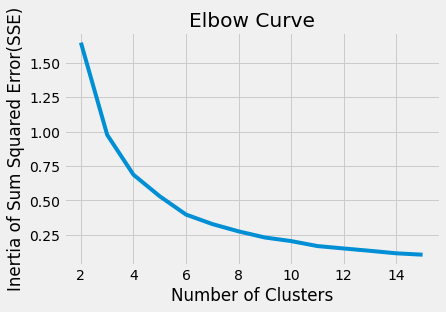

In [13]:
#Elbow method to determine number of clusters to group the stocks 
#Get and store the annual returns and annual variances 

X = df2[['Returns', 'Variances']].values
inertia_list = []

for k in range(2,16):
  #Create and train the model 
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)

#Plot the data 
plt.plot(range(2,16), inertia_list)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia of Sum Squared Error(SSE)')
plt.show()

In [14]:
#Get and show the labels

kmeans = KMeans(n_clusters=6).fit(X)
labels = kmeans.labels_
labels

array([3, 0, 2, 3, 0, 0, 0, 3, 0, 2, 0, 0, 0, 4, 0, 0, 0, 4, 3, 2, 0, 4,
       0, 0, 2, 4, 0, 5, 2, 2, 0, 3, 2, 0, 2, 0, 2, 5, 0, 0, 4, 2, 0, 0,
       0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 4, 4, 0, 1, 2, 2, 5, 0, 4, 0, 3,
       0, 2, 4, 0, 0, 0, 2, 0, 0, 0, 0, 5, 4, 2, 0, 0, 1, 2, 5, 2, 2, 0,
       4, 4, 0, 0, 0], dtype=int32)

In [15]:
df2['Cluster_Labels'] = labels
df2

,Stock_Symbols,Variances,Returns,Cluster_Labels
0,AAPL,0.117428,0.469153,3
1,ABBV,0.073698,0.216897,0
2,ADBE,0.135868,0.245828,2
3,AMD,0.302604,0.610588,3
4,AMGN,0.070880,0.134893,0
...,...,...,...,...
88,VZ,0.037835,0.005903,4
89,WBA,0.120296,-0.056302,4
90,WM,0.055276,0.220233,0
91,WMT,0.054715,0.137599,0


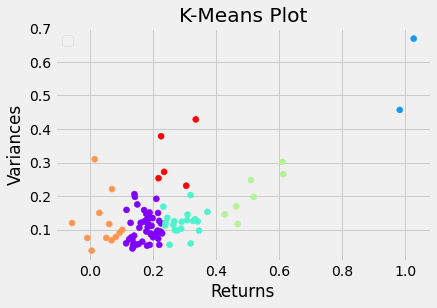

In [32]:
#Plot and show the different clusters 
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.title('K-Means Plot')
plt.xlabel('Returns')
plt.ylabel('Variances')
plt.legend(loc='upper left')
plt.show()

In [35]:
#Create a function to build a simple diverse portfolio 

def diversed_port():
  for i in range(0,6):
    symbol = df2[ df2['Cluster_Labels'] == i].head(5)
    print(symbol[['Stock_Symbols', 'Cluster_Labels']])

In [36]:
diversed_port()

  Stock_Symbols  Cluster_Labels
1          ABBV               0
4          AMGN               0
5           AMT               0
6          AMZN               0
8          ATVI               0
   Stock_Symbols  Cluster_Labels
58          MRNA               1
82          TSLA               1
   Stock_Symbols  Cluster_Labels
2           ADBE               2
9            AXP               2
19          COST               2
24            DE               2
28            EL               2
   Stock_Symbols  Cluster_Labels
0           AAPL               3
3            AMD               3
7           ASML               3
18           CMG               3
31          FTNT               3
   Stock_Symbols  Cluster_Labels
13           BSX               4
17           CLX               4
21          CSCO               4
25           DIS               4
40          INTC               4
   Stock_Symbols  Cluster_Labels
27           DRI               5
37           HAL               5
61            MU